<a href="https://colab.research.google.com/github/MOULIK-RAZDAN/LINEAR-REGRESSION-ON-INSURANCE-POLICY/blob/main/Linear_Regression_on_Insurance_policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
medical_urls = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve
urlretrieve(medical_urls,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fd30781c7d0>)

In [3]:
import pandas as pd
import numpy as np


In [4]:
medical_df = pd.read_csv('medical.csv')

In [5]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#EXPLORATORY DATA ANNALYSIS

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [9]:
#set default size and font of the visualization
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16,9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## AGE

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
fig = px.histogram(medical_df,x = 'age',marginal='box',nbins=47,title='Distribution of age',)
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
medical_df.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

#BODY MASS INDEX


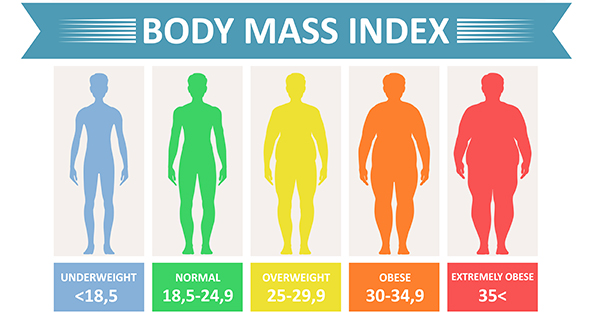

In [13]:
fig = px.histogram(medical_df,x = 'bmi',title = 'Body mass Index',marginal= 'violin',color_discrete_sequence=['grey'])
fig.update_layout(bargap = 0.1)
fig

BMI follows a gaussian distribution.It would be easier for us to analyze data.

In [14]:
fig = px.scatter(medical_df,x = 'bmi',y='age',title = 'Distribution of age and BMI over gender',color = 'sex')
#fig.update_layout(bargap = 0.1)
fig

##BMI over charges


In [15]:
fig = px.scatter(medical_df,x ='bmi',y='charges',color = 'smoker',hover_data=['sex'],title = 'BMI vs charges')
fig

#CHARGES

In [16]:
fig = px.histogram(medical_df,x ='charges',title = 'annual medical charges',color= 'smoker',color_discrete_sequence=['grey','wheat'])
fig.update_layout(bargap = 0.1)
fig

In [17]:
fig = px.scatter(medical_df,x = 'age',y = 'charges',color = 'smoker',title = 'varaition of charges over age')
fig

The data can be divided into three clusters



*   1st group will contains only smokers (represented by blue color)
*   2nd group will contains smokers and non-smokers
*   3rd group will contains only non-smokers (represented by red color)



* It is evident from the scatterplot that the persons who smoke are ought to pay more premium for the insurance.


* The data is depended upon whether the person is a smoker or not.






#SMOKER


In [18]:
medical_df.value_counts('smoker')

smoker
no     1064
yes     274
dtype: int64

In [19]:
274/(1064+274)*100


20.47832585949178

20% percent of people are smokers


In [20]:
medical_df.value_counts(['age','smoker'],sort=True).head(50)

age  smoker
18   no        57
19   no        50
21   no        26
50   no        25
26   no        25
28   no        25
41   no        25
46   no        24
55   no        24
45   no        24
48   no        24
49   no        24
58   no        24
25   no        23
51   no        23
52   no        23
53   no        23
54   no        23
38   no        23
40   no        22
22   no        22
57   no        22
24   no        22
56   no        22
31   no        22
59   no        21
29   no        21
23   no        21
32   no        21
34   no        21
44   no        21
20   no        20
33   no        20
35   no        20
42   no        19
39   no        19
62   no        19
47   no        19
27   no        19
36   no        19
60   no        18
19   yes       18
63   no        18
30   no        18
61   no        17
37   no        16
43   no        15
64   no        15
43   yes       12
18   yes       12
dtype: int64

In [21]:
fig= px.pie(medical_df,names ='age',color = 'smoker',color_discrete_sequence=['grey','wheat'] )
fig

In [22]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker',color_discrete_sequence=['lightblue','orange'])

In [23]:
smoker_val = {'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_val)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [24]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


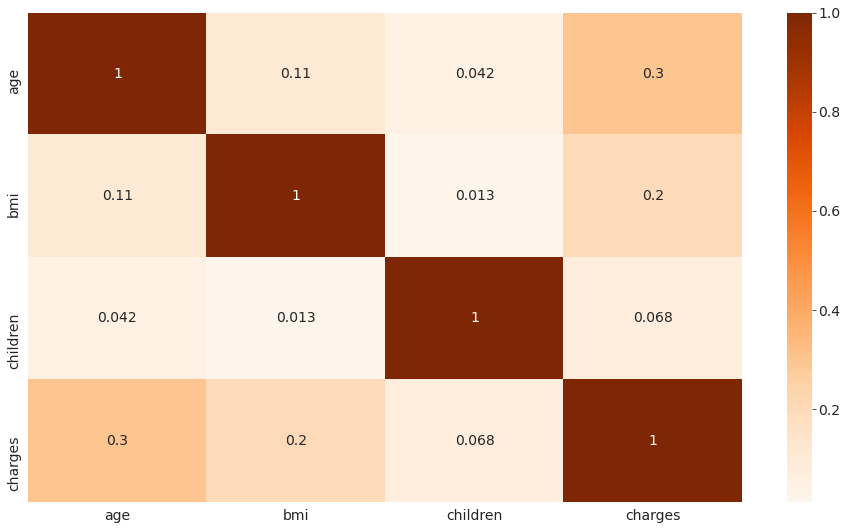

In [25]:
sns.heatmap(medical_df.corr(),cmap='Oranges',annot=True)


#LINEAR REGRESSION USING SINGLE VARIABLE


In [26]:
non_smoker = medical_df[medical_df.smoker == 'no']

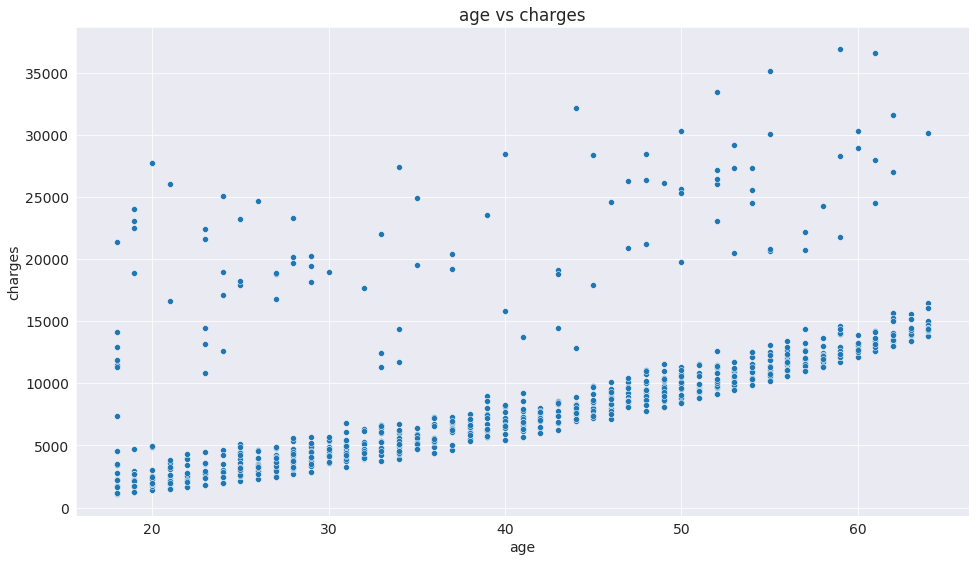

In [27]:
plt.title("age vs charges");
sns.scatterplot(data =non_smoker,x = 'age', y='charges');

It can be seen that there is a approximate linear trend between age and charges
 * Hence Linear Regression can be used 
 *   For linear Regression we may use the equation y = wx+b
 
 *   We will randomly set the value of w and b





In [28]:
def charge_estimates(w,b,age):
  return w*age +b

In [29]:
ages = non_smoker.age
est_charges = non_smoker.charges


In [30]:
w = 50
b = 100

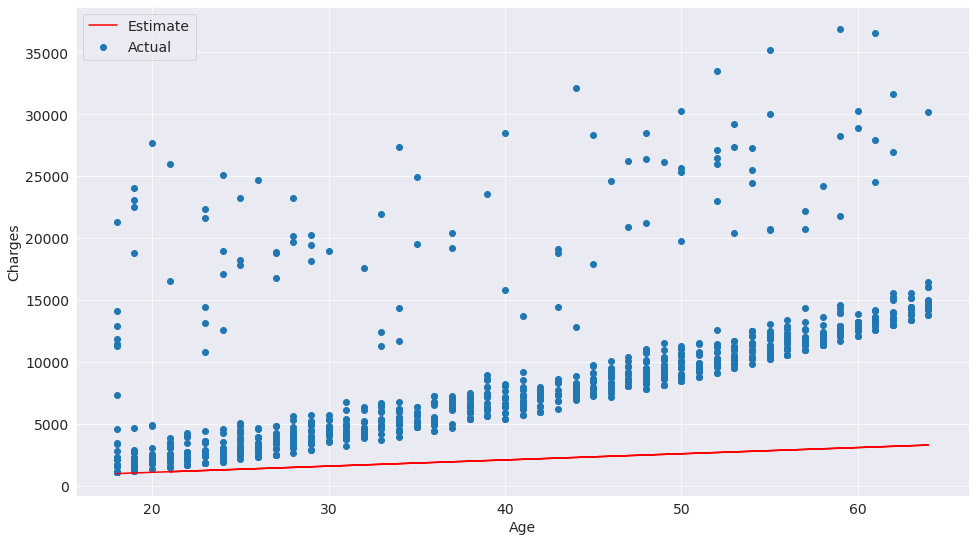

In [31]:
plt.plot(ages,charge_estimates(w,b,ages),'r')
plt.scatter(ages,est_charges)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(['Estimate','Actual']);

Our regression line does not fit perfectly. 

We will make a function called est_para which will give us the plot of age vs charges on different values of w and b.






In [32]:
def est_para(w,b):
  ages = non_smoker.age
  est_charges = non_smoker.charges
  plt.plot(ages,charge_estimates(w,b,ages),'r')
  plt.scatter(ages,est_charges)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(['Estimate','Actual']);

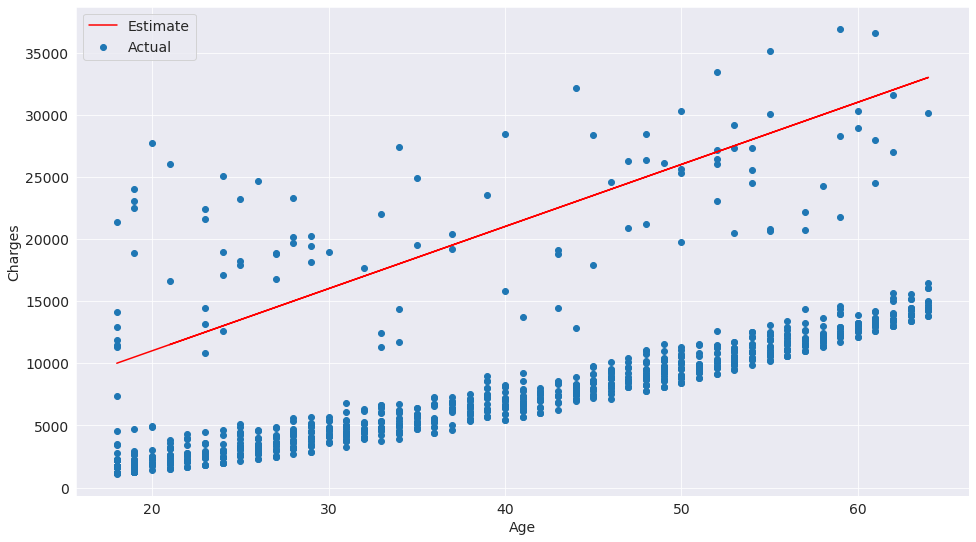

In [33]:
est_para(500,1000)

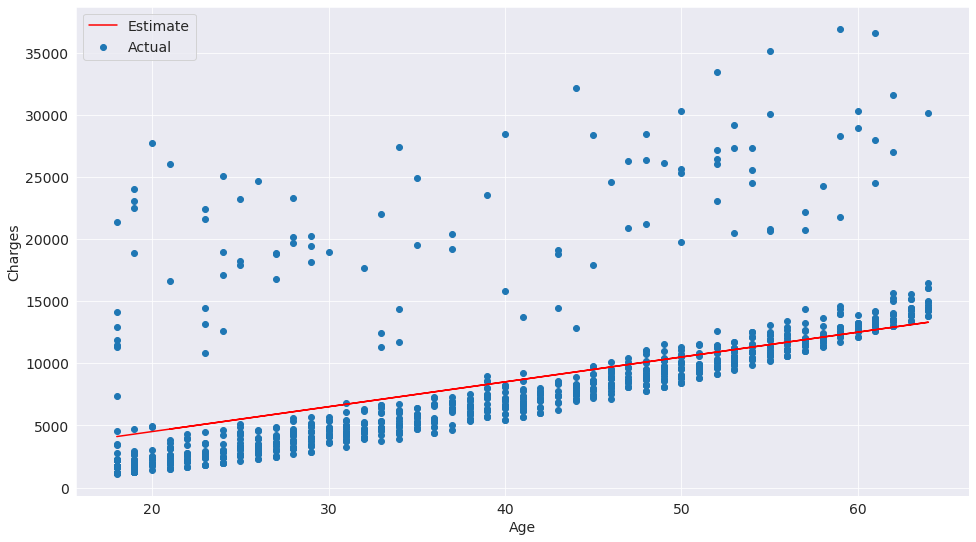

In [34]:
est_para(200,500)

This plot look more of fitted to data but we still don't know whether it is best fitted or not .

For the best fitted line will make use of scikit-learn and using stochastic gradient descent

#Linear Regression using Scikit-Learn

In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [36]:
model = LinearRegression()

In [37]:
x = non_smoker[['age']]
y =non_smoker.charges
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
predictions = model.predict(x)

In [39]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [40]:
def rmse(actual_output,predicted_output):
  return np.sqrt(np.mean(np.square(actual_output-predicted_output)))

In [41]:
rmse(y,predictions)

4662.505766636391

The root mean squared error of the predictions is 4662.50

In [42]:
w=model.coef_  
b=model.intercept_
w,b

(array([267.24891283]), -2091.4205565650864)

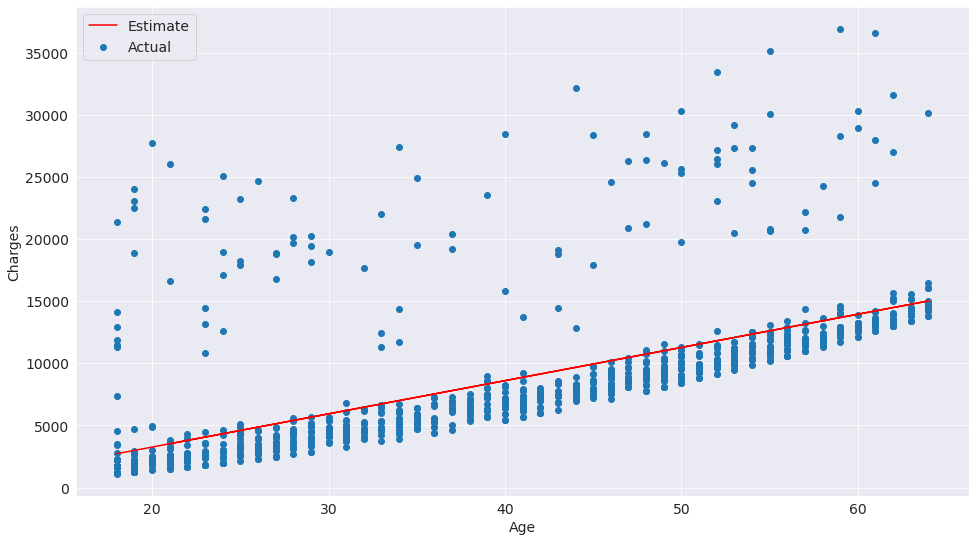

In [43]:
est_para(w,b)

All code in single block

Loss =  4662.505766636391


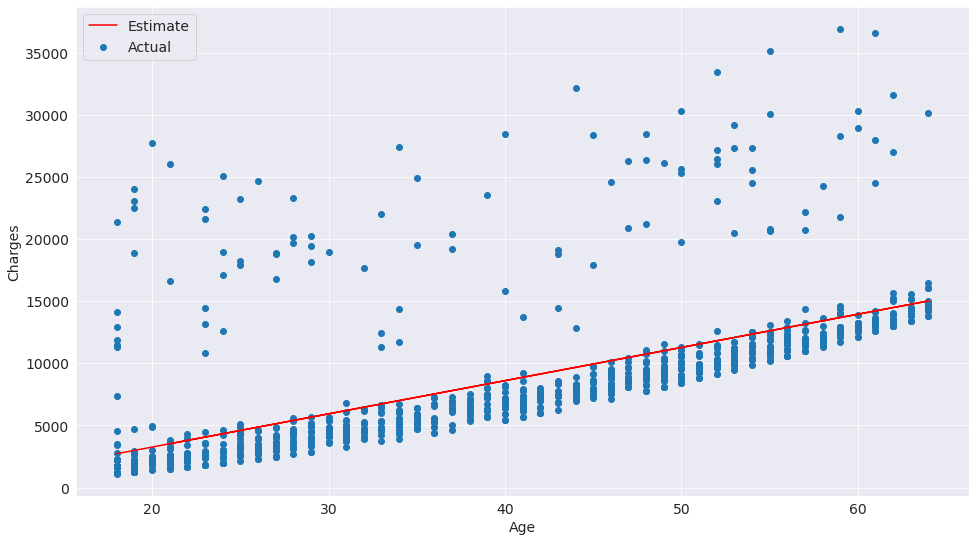

In [44]:
X,y = non_smoker[['age']],non_smoker['charges']
model = LinearRegression().fit(X,y)
predictions = model.predict(X)
loss = rmse(y,predictions)
est_para(w,b)
print('Loss = ',loss)

#Linear Regression with Multiple Variables

Now we can also add bmi as a feature.


In [45]:
X,y = non_smoker[['age','bmi']],non_smoker['charges']
model = LinearRegression().fit(X,y)
predictions = model.predict(X)
loss = rmse(y,predictions)
print('Loss:',loss)

Loss: 4662.312835461298


In [46]:
non_smoker.charges.corr(non_smoker.bmi)

0.08403654312833268

There is not much of a change in loss as bmi is not strongly correlated with charges. 

In [47]:
fig = px.scatter(non_smoker,x = 'bmi',y = 'charges',title="BMI vs Charges" )
fig

In [48]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

#Categorical Features of Machine Learning

There are 3 techniques used for Categorical Featuring :-

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1   
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.  
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called Ordinals






## BINARY CATEGORIES

'SMOKERS' category has 2 values 'yes' and 'no'.

We can create a new column representing 'yes' = 1 and 'no' = 0 

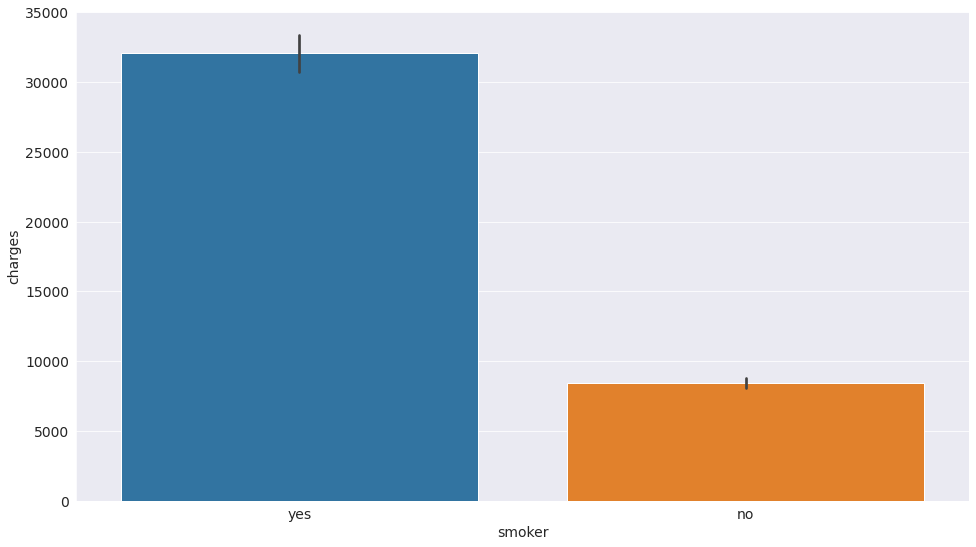

In [49]:
sns.barplot(data = medical_df,x = 'smoker',y = 'charges')

In [50]:
smoker_code = {'yes':1,'no':0}
medical_df['smoker_codes']  = medical_df.smoker.map(smoker_code)

In [51]:
medical_df.charges.corr(medical_df.smoker_codes)

0.787251430498478

Since smoking and charges are strongly correlated . There will be change in loss function.

In [52]:
X,y = medical_df[['smoker_codes','age','bmi','children']],medical_df['charges']
model = LinearRegression().fit(X,y)
predictions = model.predict(X)
loss = rmse(y,predictions)
print("Loss:",loss)

Loss: 6056.439217188077


Now we will try add '**sex**' as a column

In [53]:
medical_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [54]:
sex_codes = {'male': 0,'female':1}
medical_df['sex_code']= medical_df.sex.map(sex_codes)

In [55]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [56]:
medical_df.charges.corr(medical_df.sex_code)

-0.057292062202025484

As the value of correlation is very less, Impact of sex on the charges would be very less.

In [57]:
X, y = medical_df[['age','bmi','sex_code','smoker_codes','children']],medical_df['charges']
model = LinearRegression().fit(X,y)
predictions = model.predict(X)
loss = rmse(y,predictions)
print("Loss :" , loss)

Loss : 6056.100708754538


## ONE HOT ENCODINGS/

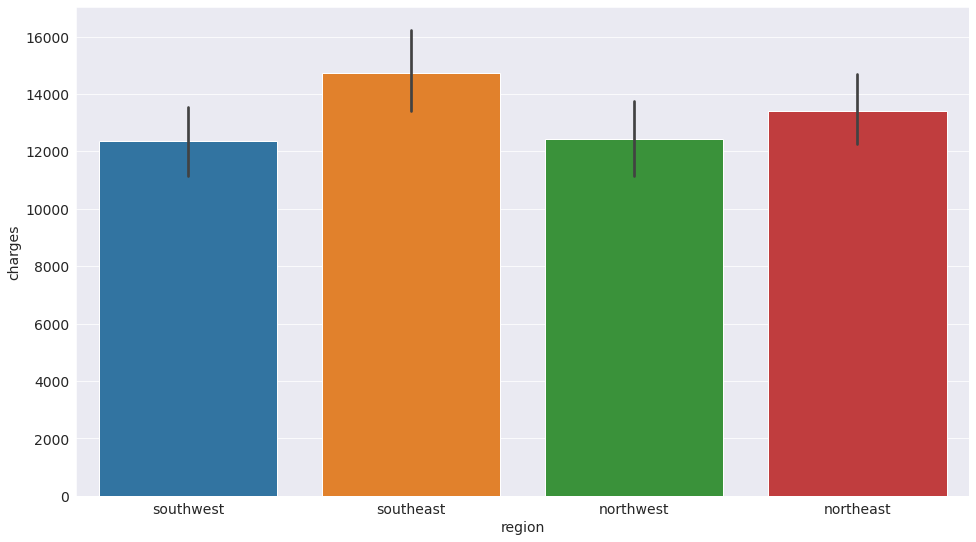

In [58]:
sns.barplot(data = medical_df,x = 'region',y ='charges')

In [59]:
from sklearn import preprocessing
encode = preprocessing.OneHotEncoder()

In [60]:
encode.fit(medical_df[['region']])
encode.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [61]:
one_hot = encode.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [62]:
medical_df[['Northeast','Northwest','Southeast','Southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_code,Northeast,Northwest,Southeast,Southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0.0,0.0,0.0,1.0


Now using Linear Regression


In [63]:
X,y = medical_df[['smoker_codes','age','bmi','children','sex_code','Northeast','Northwest','Southeast','Southwest']], medical_df['charges']
model = LinearRegression().fit(X,y)
predictions = model.predict(X)
loss = rmse(y,predictions)
print("Loss :",loss)

Loss : 6041.679651174455


There is a small reduction in the loss value.

In [69]:
model.predict([[1,32,26,2,1,0.0,0.0,1.0,0.0]])

array([28864.40808173])

#Feature Scaling

In [64]:
model.coef_

array([23848.53454191,   256.85635254,   339.19345361,   475.50054515,
         131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [65]:
model.intercept_

-12656.862170590692

In [66]:
weight_df = pd.DataFrame({
    'features' : np.append(['smoker_codes','age','bmi','children','sex_code','Northeast','Northwest','Southeast','Southwest'],1),
    'weight': np.append(model.coef_, model.intercept_)
 })
weight_df

,features,weight
0,smoker_codes,23848.534542
1,age,256.856353
2,bmi,339.193454
3,children,475.500545
4,sex_code,131.314359
5,Northeast,587.009235
6,Northwest,234.045336
7,Southeast,-448.012814
8,Southwest,-373.041756
9,1,-12656.862171


smoker_codes,bmi and Northeast has the most heavy weight.But value of smoker_codes is in '0' and '1' and that of bmi im 20-40


Hence we compare the weights of different column to identify which features are important.

We will require standardization 

In [71]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
num_cols = ['age','bmi','children']
scalar.fit(medical_df[num_cols])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
scalar.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [73]:
scalar.var_

array([197.25385199,  37.16008997,   1.45212664])

In [75]:
scaled_inputs = scalar.transform(medical_df[num_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [78]:
X = np.concatenate((scaled_inputs,medical_df[['smoker_codes','sex_code','Northeast','Northwest','Southeast','Southwest']]), axis =1)
y = medical_df.charges


In [79]:
model = LinearRegression().fit(X,y)
predictions = model.predict(X)
loss = rmse(y,predictions)
print("Loss : ",loss)

Loss :  6041.679651174453


In [82]:
weight_df  = pd.DataFrame({
    'feature': np.append(num_cols+['smoker_codes','sex_code','Northeast','Northwest','Southeast','Southwest'],1),
    'weights': np.append(model.coef_,model.intercept_)

})

weight_df.sort_values(by = 'weights',ascending = False)

,feature,weights
3,smoker_codes,23848.534542
9,1,8335.168856
0,age,3607.472736
1,bmi,2067.691966
5,Northeast,587.009235
2,children,572.998210
6,Northwest,234.045336
4,sex_code,131.314359
8,Southwest,-373.041756
7,Southeast,-448.012814


## It can be derived from the above table that our model depends highly on 3 features ,that are  

1.   Smoker
2.   Age
3.   BMI

These 3 feauture have the most expensive weight.

Hence higher contribution to the predictions.




